<a href="https://colab.research.google.com/github/SofiaMarchesi/House-Prices_k/blob/master/House_Prices_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/houses_train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/houses_test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Cópia 1

In [ ]:
train1 = train.copy()
test1 = test.copy()
print(train1.shape)
print(test1.shape)


(1460, 81)
(1459, 80)


In [ ]:
pd.set_option('display.max_rows', train1.shape[0]+1)

In [ ]:
print(display(train1.head(10)))



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

None


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Valores NaN
- Função para substituir valores NaN

In [ ]:
def FillNa(df,value):
  df = df.fillna(value)
  print(df.value_counts())
  return df

# LotFrontage 
- 1460-1201 = 259 NaN
 - A maioria (em torno de 12%) possui a medida de 60.
 - Verificar a correlação entre os ela e os outros features


In [ ]:
print(display(train1.LotFrontage.value_counts(ascending=False,normalize=True)))

60.0     0.119067
70.0     0.058285
80.0     0.057452
50.0     0.047460
75.0     0.044130
65.0     0.036636
85.0     0.033306
78.0     0.020816
21.0     0.019151
90.0     0.019151
68.0     0.015820
24.0     0.015820
64.0     0.015820
73.0     0.014988
72.0     0.014155
79.0     0.014155
63.0     0.014155
55.0     0.014155
100.0    0.013322
51.0     0.012490
66.0     0.012490
74.0     0.012490
52.0     0.011657
59.0     0.010824
71.0     0.009992
82.0     0.009992
40.0     0.009992
43.0     0.009992
67.0     0.009992
57.0     0.009992
69.0     0.009159
76.0     0.009159
86.0     0.008326
53.0     0.008326
34.0     0.008326
92.0     0.008326
88.0     0.008326
62.0     0.007494
44.0     0.007494
84.0     0.007494
77.0     0.007494
35.0     0.007494
93.0     0.006661
61.0     0.006661
98.0     0.006661
96.0     0.006661
107.0    0.005828
120.0    0.005828
95.0     0.005828
58.0     0.005828
41.0     0.004996
30.0     0.004996
81.0     0.004996
89.0     0.004996
105.0    0.004996
48.0     0

None


In [ ]:
train1[train1.LotFrontage.isna()].groupby('LotConfig')['LotConfig'].count()

LotConfig
Corner      62
CulDSac     49
FR2         14
Inside     134
Name: LotConfig, dtype: int64

# Alley
- Analisar 'Alley' - muitos valores NaN, 1369 NaN - 93% NaN.
 - Há 3 tipos: Gravel (cascalho), Paved (pavimentada), No alley acess.
 - NaN = No Alley Acess, preencher NaN com 'NA'

In [ ]:
train1[~train1.Alley.isna()].groupby('Alley')['Alley'].count()

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
train1['Alley']=FillNa(train1.Alley,'NA')
test1['Alley']=FillNa(test1.Alley,'NA')

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
NA      1352
Grvl      70
Pave      37
Name: Alley, dtype: int64


# MasVnrType e MasVnrArea
- Analisar MasVnrType e MasVnrArea, ambos com a mesma quantidade de NaN - 8
- Os NaN referem-se as mesmas residências
- Grande parte das residências 59% estão em None, portanto, será colocado nos NaN como sendo 'None'
- MasVnrArea = 0.0

In [ ]:
print(train1[train1.MasVnrType.isna()])
print(train1[train1.MasVnrArea.isna()])

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
234    235          60       RL  ...        WD         Normal    216500
529    530          20       RL  ...        WD         Alloca    200624
650    651          60       FV  ...        WD         Normal    205950
936    937          20       RL  ...        WD         Normal    184900
973    974          20       FV  ...       New        Partial    182000
977    978         120       FV  ...       New        Partial    199900
1243  1244          20       RL  ...       New        Partial    465000
1278  1279          60       RL  ...        WD         Normal    237000

[8 rows x 81 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
234    235          60       RL  ...        WD         Normal    216500
529    530          20       RL  ...        WD         Alloca    200624
650    651          60       FV  ...        WD         Normal    205950
936    937          20       RL  ...     

In [ ]:
train1.MasVnrType.value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [ ]:
train1.groupby('MasVnrType')['SalePrice'].mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156221.891204
Stone      265583.625000
Name: SalePrice, dtype: float64

In [ ]:
train1['MasVnrType']=FillNa(train1['MasVnrType'],'None')
train1['MasVnrArea'] = FillNa(train1['MasVnrArea'],0.0)

test1['MasVnrType']=FillNa(test1['MasVnrType'],'None')
test1['MasVnrArea'] = FillNa(test1['MasVnrArea'],0.0)


None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0       869
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2

In [ ]:
train1.MasVnrType.shape

(1460,)

In [ ]:
train1.MasVnrArea.shape

(1460,)

# BsmtQual, BsmtCond,BstmExposure,BstmFinType1,BstmFinType2
- Todos com 37 NaN
- Inicialmente, considerar-se-á como 'NA'

In [ ]:
index_Qual = train1.BsmtQual[train1.BsmtQual.isna()].index
index_Cond = train1.BsmtCond[train1.BsmtCond.isna()].index
index_Exp = train1.BsmtExposure[train1.BsmtExposure.isna()].index
index_Type1 = train1.BsmtFinType1[train1.BsmtFinType1.isna()].index
index_Type2 = train1.BsmtFinType2[train1.BsmtFinType2.isna()].index

Abaixo, verifica-se que são as mesmas casas que possuem NaN nas 4 features analisadas.

In [ ]:
print(train1.BsmtQual.value_counts())
print(train1.BsmtCond.value_counts())
print(train1.BsmtExposure.value_counts())
print(train1.BsmtFinType1.value_counts())
print(train1.BsmtFinType2.value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [ ]:
train1.BsmtQual = FillNa(train1.BsmtQual,'NA')
train1.BsmtCond = FillNa(train1.BsmtCond,'NA')
train1.BsmtExposure = FillNa(train1.BsmtExposure,'NA')
train1.BsmtFinType1 = FillNa(train1.BsmtFinType1,'NA')
train1.BsmtFinType2 = FillNa(train1.BsmtFinType2,'NA')


test1.BsmtQual = FillNa(test1.BsmtQual,'NA')
test1.BsmtCond = FillNa(test1.BsmtCond,'NA')
test1.BsmtExposure = FillNa(test1.BsmtExposure,'NA')
test1.BsmtFinType1 = FillNa(test1.BsmtFinType1,'NA')
test1.BsmtFinType2 = FillNa(test1.BsmtFinType2,'NA')


TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
TA    634
Gd    591
Ex    137
Fa     53
NA     44
Name: BsmtQual, dtype: int64
TA    1295
Fa      59
Gd      57
NA      45
Po       3
Name: BsmtCond, dtype: int64
No    951
Av    197
Gd    142
Mn    125
NA     44
Name: BsmtExposure, dtype: int64
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NA      42
Name: BsmtFinType1, dtype: int64
Unf    1237
Rec      51
NA       42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


# Electrical 
- 1 NaN
- Considerar como SBrkr: o mais comum

In [ ]:
train1.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
train1.Electrical = FillNa(train1.Electrical,'SBrkr')

test1.Electrical = FillNa(test1.Electrical,'SBrkr')

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


# FirePlacesQu
- 690 NaN
- Verificando os valores do 'FirePlace', no qual está completo, há 690 residências sem lareira e há 690 NaN do feature 'FirePlaceQu', portanto, serão preenchidos com 'NA'.


In [ ]:
print(train1.Fireplaces.value_counts())

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


In [ ]:
train1.FireplaceQu = FillNa(train1.FireplaceQu,'NA')
test1.FireplaceQu = FillNa(test1.FireplaceQu,'NA')

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
NA    730
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64


# GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageAreas,GarageQual,GarageCond
- GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond: tem 81 NaN, verificar se são as mesmas residências e analisar GarageCars e GarageArea, nos quais estão completos

In [ ]:
print(train1.GarageCars.value_counts())
print(train1.GarageType.value_counts())
train1.GarageType=FillNa(train1.GarageType,'NA')
train1.GarageYrBlt=FillNa(train1.GarageYrBlt,0)
train1.GarageFinish=FillNa(train1.GarageFinish,'NA')
train1.GarageQual=FillNa(train1.GarageQual,'NA')
train1.GarageCond=FillNa(train1.GarageCond,'NA')


test1.GarageType=FillNa(test1.GarageType,'NA')
test1.GarageYrBlt=FillNa(test1.GarageYrBlt,0)
test1.GarageFinish=FillNa(test1.GarageFinish,'NA')
test1.GarageQual=FillNa(test1.GarageQual,'NA')
test1.GarageCond=FillNa(test1.GarageCond,'NA')


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1962.0    21
2009.0    21
1966.0    21
1965.0    21
1958.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1997.0    19
1978.0    19
1960.0    19
1954.0    19
1974.0    18
1995.0    18
1994.0    18
1964.0    18
1959.0    17
1956.0    16
1990.0    16
1963.0    16
1979.0    15
1980.0    15
1967.0    15
1969.0    15
1973.0    14
1920.0    14
1988.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1987

# Pool
- PoolArea,PoolQC(7 Non-null)

In [ ]:
train1.PoolQC[~train1.PoolQC.isna()]


197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [ ]:
train1.PoolQC=FillNa(train1.PoolQC,'NA')
test1.PoolQC=FillNa(test1.PoolQC,'NA')

NA    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64
NA    1456
Ex       2
Gd       1
Name: PoolQC, dtype: int64


# Fence 
- 281 non-null

In [ ]:
train1.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [ ]:
train1.Fence = FillNa(train1.Fence,'NA')
test1.Fence = FillNa(test1.Fence,'NA')

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
NA       1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: Fence, dtype: int64


# MiscFeature
- 54 Non-null
- Percebe-se que não consta nenhum com elevador. Neste processamento de dados preliminar, será considerado todos os NaN como sendo NA

In [ ]:
train1.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
train1.MiscFeature = FillNa(train1.MiscFeature,'NA')

test1.MiscFeature = FillNa(test1.MiscFeature,'NA')

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
NA      1408
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64


# Todos os NaN processados, exceto LotFrontage que será presumido por meio de KNN

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train2 = train1.copy()
test2 = test1.copy()

# Transformar alguns features em categóricos
1. Sem alterar para números
2. Alterar valores para numéricos categóricos

In [ ]:
train1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
categorical = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation','Heating','HeatingQC','Electrical','GarageType','MiscFeature', 
       'SaleType','SaleCondition','OverallQual','OverallCond','ExterQual','ExterCond',
       'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual',
       'Functional','Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish','GarageCars',
       'GarageArea','GarageQual','GarageCond','PoolQC','Fence','MoSold','YrSold','CentralAir','PavedDrive']
len(categorical)

52

In [ ]:
train2[categorical] = train2[categorical].astype('category')
test2[categorical] = test2[categorical].astype('category')

In [ ]:
train2['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

In [ ]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          1459 non-null   category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   ca

In [ ]:
test2.Fireplaces.value_counts()


0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64

2. Alterando alguns features para uma escala categórica

In [ ]:
train2['MSSubClass'].unique()

[60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [60, 20, 70, 50, ..., 160, 75, 180, 40]

In [ ]:
train2['MSSubClass']=train2['MSSubClass'].cat.rename_categories({20:'A',30:'B',40:'C',45:'D',50:'E',
                                                                 60:'F',70:'G',75:'H',80:'I',85:'J',
                                                                 90:'L',120:'M',150:'N',160:'O',180:'P'
                                                                 ,190:'Q'})

test2['MSSubClass']=test2['MSSubClass'].cat.rename_categories({20:'A',30:'B',40:'C',45:'D',50:'E',
                                                                 60:'F',70:'G',75:'H',80:'I',85:'J',
                                                                 90:'L',120:'M',150:'N',160:'O',180:'P'
                                                                 ,190:'Q'})


In [ ]:
print(train2.MSSubClass.value_counts())

print(test2.MSSubClass.value_counts())



A    536
F    299
E    144
M     87
B     69
O     63
G     60
I     58
L     52
Q     30
J     20
H     16
D     12
P     10
C      4
Name: MSSubClass, dtype: int64
A    543
F    276
E    143
M     95
B     70
G     68
O     65
I     60
L     57
Q     31
J     28
P      7
H      7
D      6
C      2
N      1
Name: MSSubClass, dtype: int64


In [ ]:
train2['ExterQual'].unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

In [ ]:
train2['ExterQual']=train2['ExterQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

test2['ExterQual']=test2['ExterQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [ ]:
train2['ExterCond']=train2['ExterCond'].cat.rename_categories(({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))
test2['ExterCond']=test2['ExterCond'].cat.rename_categories(({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))

In [ ]:
train2['BsmtQual']=train2['BsmtQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
test2['BsmtQual']=test2['BsmtQual'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [ ]:
train2['BsmtCond']=train2['BsmtCond'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
test2['BsmtCond']=test2['BsmtCond'].cat.rename_categories({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [ ]:
train2['BsmtExposure']=train2['BsmtExposure'].cat.rename_categories({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

test2['BsmtExposure']=test2['BsmtExposure'].cat.rename_categories({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

In [ ]:
train2['BsmtFinType1'].unique()

[GLQ, ALQ, Unf, Rec, BLQ, NA, LwQ]
Categories (7, object): [GLQ, ALQ, Unf, Rec, BLQ, NA, LwQ]

In [ ]:
train2['BsmtFinType1']=train2['BsmtFinType1'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

test2['BsmtFinType1']=test2['BsmtFinType1'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

In [ ]:
train2['BsmtFinType2']=train2['BsmtFinType2'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

test2['BsmtFinType2']=test2['BsmtFinType2'].cat.rename_categories({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})



In [ ]:
train2['GarageQual'].unique()

[TA, Fa, Gd, NA, Ex, Po]
Categories (6, object): [TA, Fa, Gd, NA, Ex, Po]

In [ ]:
train2['KitchenQual']=train2['KitchenQual'].cat.rename_categories({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})

test2['KitchenQual']=test2['KitchenQual'].cat.rename_categories({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1})

In [ ]:
train2['Functional']=train2['Functional'].cat.rename_categories({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2,'Sal':1})

test2['Functional']=test2['Functional'].cat.rename_categories({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2,'Sal':1})

In [ ]:
train2['FireplaceQu']=train2['FireplaceQu'].cat.rename_categories({'NA':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1})

test2['FireplaceQu']=test2['FireplaceQu'].cat.rename_categories({'NA':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1})

In [ ]:
train2['GarageFinish']=train2['GarageFinish'].cat.rename_categories({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

test2['GarageFinish']=test2['GarageFinish'].cat.rename_categories({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

In [ ]:
train2['GarageQual']=train2['GarageQual'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})
test2['GarageQual']=test2['GarageQual'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})

In [ ]:
train2['GarageCond']=train2['GarageCond'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})
test2['GarageCond']=test2['GarageCond'].cat.rename_categories({'TA':3, 'Fa':2, 'Gd':4, 'NA':0, 'Ex':5, 'Po':1})

In [ ]:
train2['PavedDrive'].unique()

[Y, N, P]
Categories (3, object): [Y, N, P]

In [ ]:
train2['PavedDrive']=train2['PavedDrive'].cat.rename_categories({'Y':2,'P':1,'N':0})

test2['PavedDrive']=test2['PavedDrive'].cat.rename_categories({'Y':2,'P':1,'N':0})


In [ ]:
train2['CentralAir'].unique()

[Y, N]
Categories (2, object): [Y, N]

In [ ]:
train2['PoolQC']=train2['PoolQC'].cat.rename_categories({'NA':0, 'Ex':4, 'Fa':1, 'Gd':3,'TA':2})

test2['PoolQC']=test2['PoolQC'].cat.rename_categories({'NA':0, 'Ex':4, 'Fa':1, 'Gd':3,'TA':2})

In [ ]:
train2['CentralAir']=train2['CentralAir'].cat.rename_categories({'Y':1,'N':0})
test2['CentralAir']=test2['CentralAir'].cat.rename_categories({'Y':1,'N':0})


In [ ]:
test3 = test2.copy()
train3 = train2.copy()







In [ ]:
test3[categorical].describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,HeatingQC,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MoSold,YrSold,CentralAir,PavedDrive
count,1459,1455,1459,1459,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1459,1459,1459,1459,1459,1459,1459,1458,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1457,1459,1459,1459.0,1459,1458.0,1458.0,1459,1459,1459,1459,1459,1459,1459,1459
unique,16,5,2,3,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,6,4,5,4,7,4,9,6,10,9,4,5,5,5,5,7,7,4,7,5,6,98.0,4,6.0,459.0,5,6,3,5,12,5,2,3
top,A,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Ex,SBrkr,Attchd,NA,WD,Normal,5,5,3,3,3,3,1,6,1,3,8,0,0,0.0,1,2.0,0.0,3,3,0,NA,6,2007,1,2
freq,543,1114,1453,1352,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,894,661,1446,752,1337,853,1408,1258,1204,428,824,892,1256,634,1295,951,431,1237,757,1357,730,730,78.0,625,770.0,76.0,1293,1328,1456,1169,250,363,1358,1301


In [ ]:
train3[categorical].describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,HeatingQC,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MoSold,YrSold,CentralAir,PavedDrive
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,6,6,5,5,7,5,9,6,10,9,4,5,5,5,5,7,7,4,7,4,6,98.0,4,5,441,6,6,4,5,12,5,2,3
top,A,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Ex,SBrkr,Attchd,NA,WD,Normal,5,5,3,3,3,3,1,1,1,3,8,0,0,0.0,1,2,0,3,3,0,NA,6,2009,1,2
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,647,1428,741,1335,870,1406,1267,1198,397,821,906,1282,649,1311,953,430,1256,735,1360,690,690,81.0,605,824,81,1311,1326,1453,1179,253,338,1365,1340


# Análise da correlação dos dados LotFrontage

In [ ]:
temp = train3.corr()
#Apesar se constar correlação entre LotFrontage e PoolArea, este há muitos valores NA, que podem distorcer o modelo.
corr_lot = temp['LotFrontage'].sort_values(ascending=False)
print(corr_lot)
#Todos os valores da análise de correlação, ordenados da maior a menor correlação
all_lot = list(corr_lot[1:28].index)
all_lot.remove('PoolArea')

all_lot


LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
BedroomAbvGr     0.263170
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.192411
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
EnclosedPorch    0.010700
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
Name: LotFrontage, dtype: float64


['1stFlrSF',
 'LotArea',
 'GrLivArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'SalePrice',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'FullBath',
 'MasVnrArea',
 'OpenPorchSF',
 'BsmtUnfSF',
 'YearBuilt',
 'BsmtFullBath',
 'YearRemodAdd',
 'WoodDeckSF',
 '2ndFlrSF',
 '3SsnPorch',
 'HalfBath',
 'BsmtFinSF2',
 'ScreenPorch',
 'LowQualFinSF',
 'EnclosedPorch',
 'MiscVal',
 'KitchenAbvGr',
 'BsmtHalfBath']

In [ ]:
#Somente os valores contínuos
importance_lot2= [
 '1stFlrSF',
 'LotArea',
 'GrLivArea',
 'TotalBsmtSF',
 'SalePrice',
 'BsmtFinSF1',
 'MasVnrArea',
 'OpenPorchSF',
 'BsmtUnfSF']

# Análise e exclusão dos outliers

Visualiza-se que há vários "outliers" que podem distorcer os valores do modelo de previsão dos valores do LotFrontage. Portanto, serão retirados.

# Gráfico com todos os features da correlação

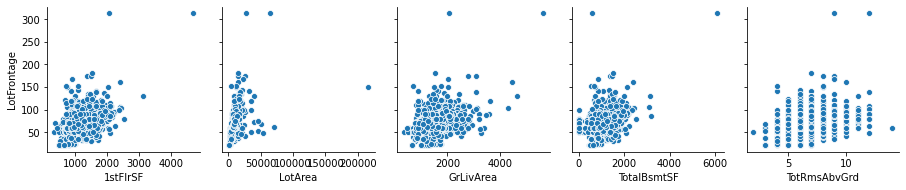

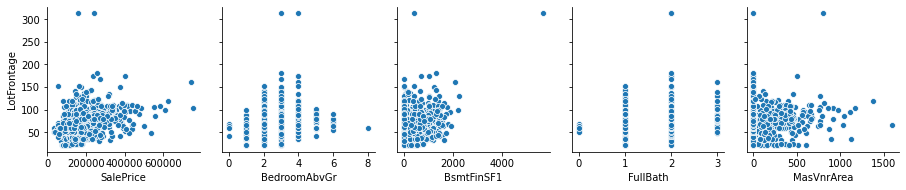

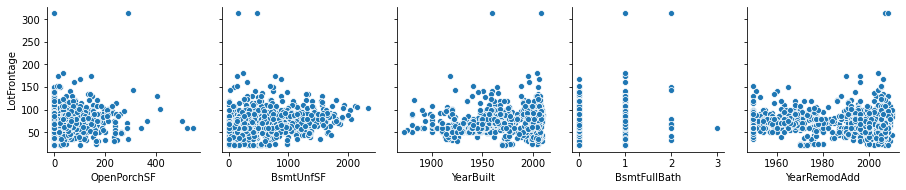

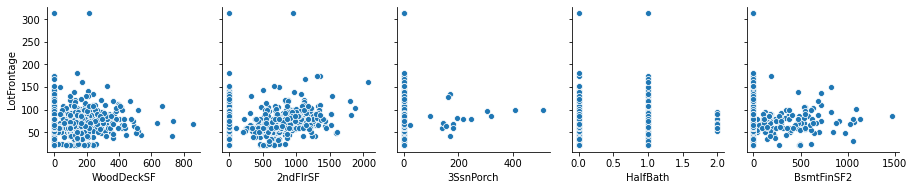

In [ ]:
#Não foram inseridos no gráfico os 6 features com menores correlações

g = sns.PairGrid(train3,x_vars=all_lot[:5],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train3,x_vars=all_lot[5:10],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train3,x_vars=all_lot[10:15],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(train3,x_vars=all_lot[15:20],y_vars='LotFrontage',)
g.map(sns.scatterplot)




In [ ]:
train3[train3['LotFrontage']>270]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,A,RL,313.0,27650,Pave,NA,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,4,3,4,6,425,1,0,160,585,GasA,...,1,SBrkr,2069,0,0,2069,1,0,2,0,4,1,4,9,8,1,4,Attchd,1960.0,2,2,505,3,3,2,0,0,0,0,0,0,0,NA,NA,0,11,2008,WD,Normal,242000
1298,1299,F,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,6,5644,1,0,466,6110,GasA,...,1,SBrkr,4692,950,0,5642,2,0,2,1,3,1,5,12,8,3,4,Attchd,2008.0,3,2,1418,3,3,2,214,292,0,0,0,480,3,NA,NA,0,1,2008,New,Partial,160000


- Há 2 dados evidentes que estão fora da média, com valores LotFrontage >270
- No feature 'LotArea', há um valor (maior que 200000) distorcendo o gráfico.

In [ ]:

drop1_ =  train3.drop(labels = train3[train3['LotFrontage']>270].index)
drop1 = drop1_.drop(train3[train3['LotArea']>200000].index)

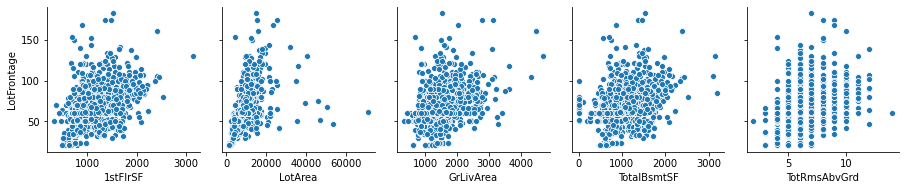

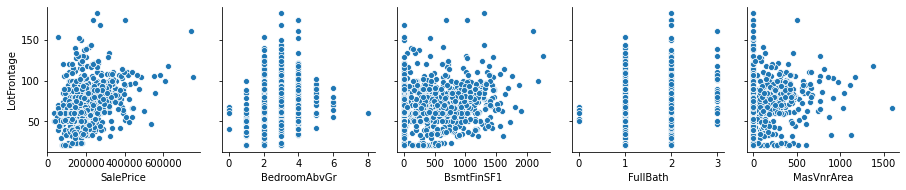

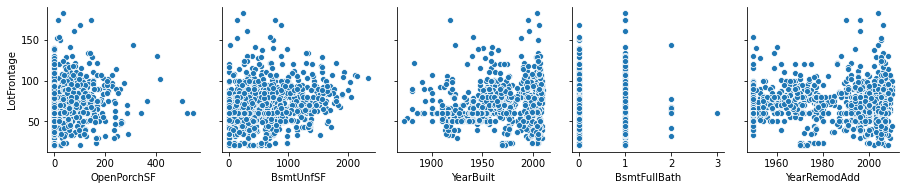

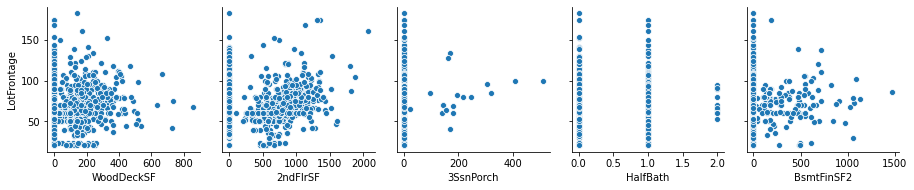

In [ ]:
g = sns.PairGrid(drop1,x_vars=all_lot[:5],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop1,x_vars=all_lot[5:10],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop1,x_vars=all_lot[10:15],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop1,x_vars=all_lot[15:20],y_vars='LotFrontage',)
g.map(sns.scatterplot)



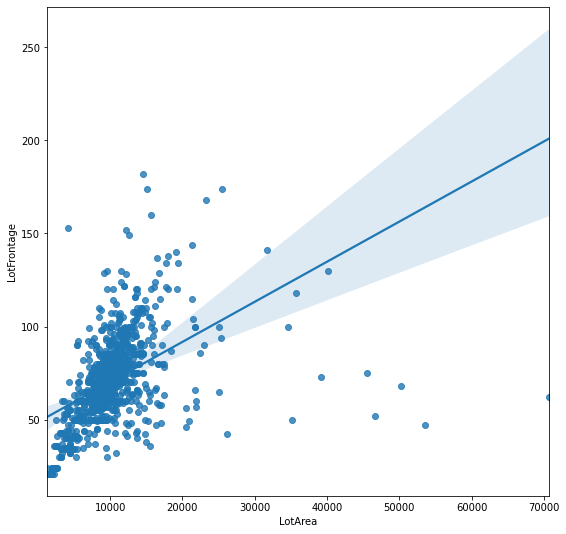

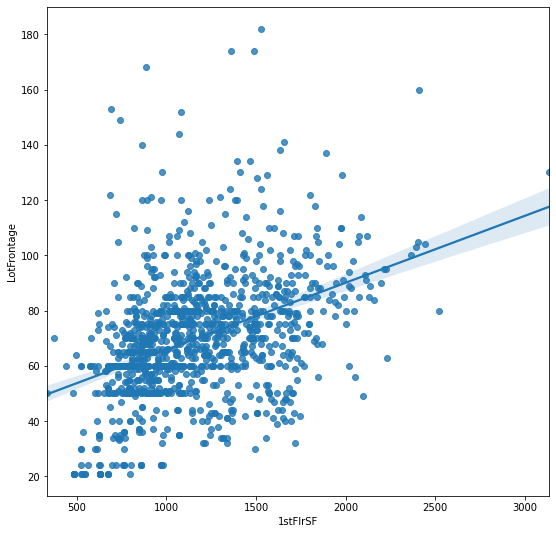

In [ ]:
f, ax = plt.subplots(figsize=(9,9))
sns.regplot(x='LotArea',y='LotFrontage',data=drop1)

f, ax = plt.subplots(figsize=(9,9))
sns.regplot(x='1stFlrSF',y='LotFrontage',data=drop1)

In [ ]:
#low_values_drop = drop3[['LotFrontage','LotArea']][(drop3['LotFrontage']<30) & (drop3['LotArea']<3000)]

In [ ]:
drop2 = drop1.drop(drop1[drop1['LotArea']>25000].index)
drop2_ = drop2.drop(drop2[drop2['LotArea']>20000].index)
drop3 = drop2_.drop(drop2_[drop2_['LotFrontage']>140].index)
#drop3_ = drop3.drop(low_values_drop.index)

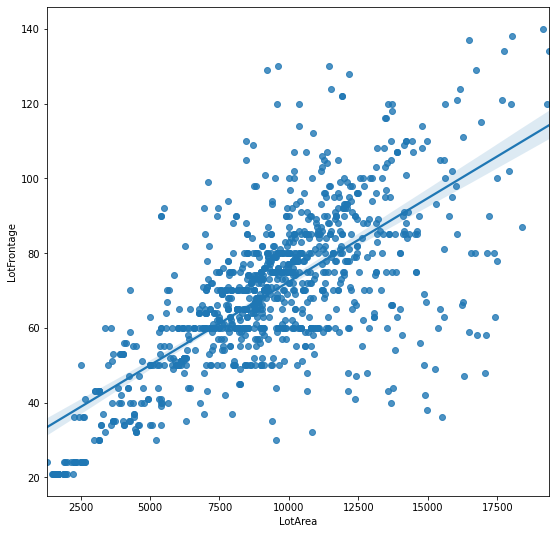

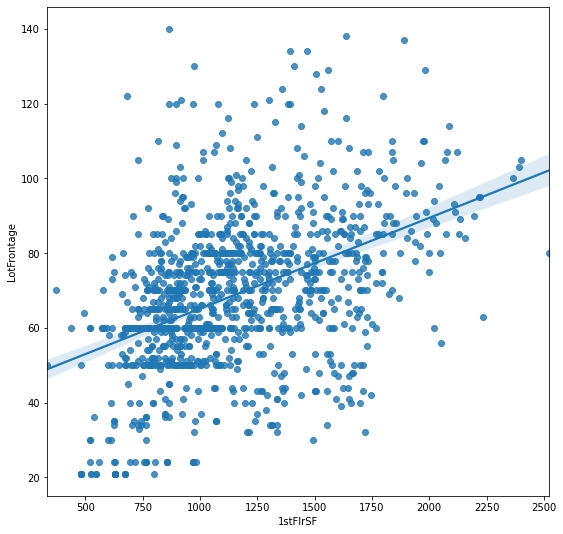

In [ ]:
f, ax = plt.subplots(figsize=(9,9))
sns.regplot(x='LotArea',y='LotFrontage',data=drop3)

f, ax = plt.subplots(figsize=(9,9))
sns.regplot(x='1stFlrSF',y='LotFrontage',data=drop3)

# Correlação após retirada os "outliers"

In [ ]:
corr = drop3.corr()
print(corr['LotFrontage'].sort_values(ascending=False))
all_lot2 = list(corr['LotFrontage'].sort_values(ascending=False).index)[1:28]

all_lot2.remove('PoolArea')
all_lot2.remove('3SsnPorch')
all_lot2.remove('YearRemodAdd')

all_lot2

LotFrontage      1.000000
LotArea          0.707043
1stFlrSF         0.431821
SalePrice        0.397203
TotalBsmtSF      0.371145
GrLivArea        0.364812
TotRmsAbvGrd     0.349913
BedroomAbvGr     0.279904
MasVnrArea       0.203250
FullBath         0.198463
BsmtUnfSF        0.185318
YearBuilt        0.145023
BsmtFinSF1       0.144051
OpenPorchSF      0.136988
WoodDeckSF       0.117729
3SsnPorch        0.092635
YearRemodAdd     0.084594
ScreenPorch      0.072335
BsmtFinSF2       0.058380
HalfBath         0.058261
BsmtFullBath     0.052464
2ndFlrSF         0.043419
PoolArea         0.023158
MiscVal          0.013597
LowQualFinSF     0.013446
KitchenAbvGr     0.002773
BsmtHalfBath    -0.015707
EnclosedPorch   -0.018625
Id              -0.036406
Name: LotFrontage, dtype: float64


['LotArea',
 '1stFlrSF',
 'SalePrice',
 'TotalBsmtSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 'MasVnrArea',
 'FullBath',
 'BsmtUnfSF',
 'YearBuilt',
 'BsmtFinSF1',
 'OpenPorchSF',
 'WoodDeckSF',
 'ScreenPorch',
 'BsmtFinSF2',
 'HalfBath',
 'BsmtFullBath',
 '2ndFlrSF',
 'MiscVal',
 'LowQualFinSF',
 'KitchenAbvGr',
 'BsmtHalfBath',
 'EnclosedPorch']

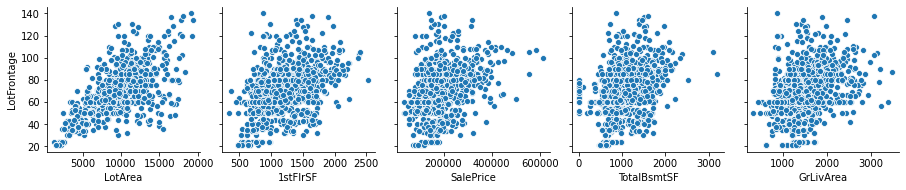

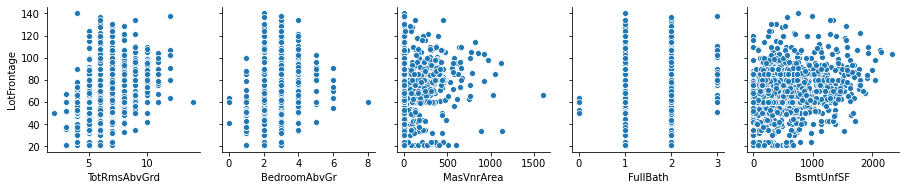

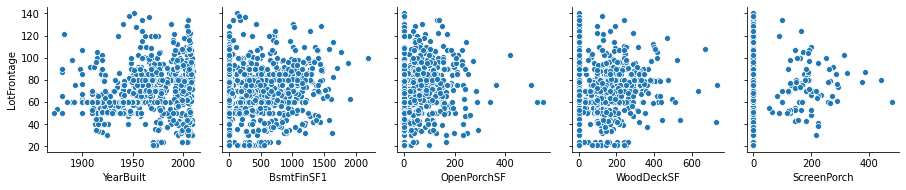

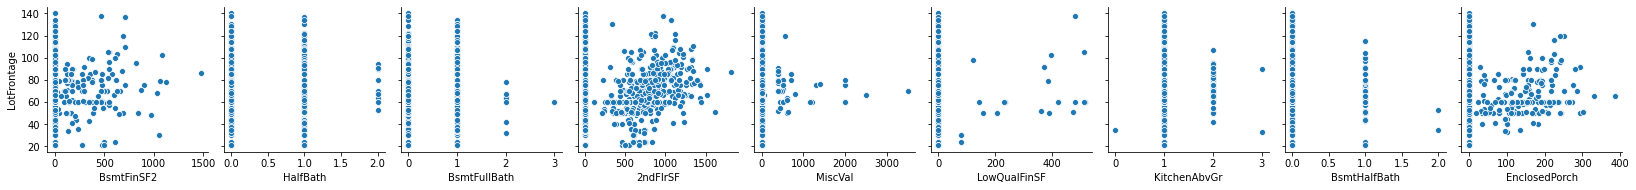

In [ ]:
g = sns.PairGrid(drop3,x_vars=all_lot2[:5],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop3,x_vars=all_lot2[5:10],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop3,x_vars=all_lot2[10:15],y_vars='LotFrontage',)
g.map(sns.scatterplot)

g = sns.PairGrid(drop3,x_vars=all_lot2[15:],y_vars='LotFrontage',)
g.map(sns.scatterplot)


In [ ]:
continuos = ['LotArea',
 '1stFlrSF',
 'SalePrice',
 'GrLivArea',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'WoodDeckSF',
 'ScreenPorch',
 '2ndFlrSF',
 'BsmtHalfBath',
 'EnclosedPorch']

In [ ]:
pouco_zeros = ['LotArea',
 '1stFlrSF',
 'SalePrice',
 'GrLivArea']

In [ ]:
drop3.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Dividindo os dados entre NotNan (treino/teste)  e NaN (previsão)

In [ ]:
train4 = drop3.copy()

In [ ]:
# Filtrar os valores com NaN e os sem NaN
#Sem NaN, serão os valores do modelo
train_notnan = train4[~train4.LotFrontage.isna()]
#Com NaN, os que serão preditados
train_nan = train4[train4.LotFrontage.isna()]

In [ ]:
train_nan = train_nan.drop('LotFrontage',axis=1)

In [ ]:
#train_nan_pred = train_nan[importance_lot1]

In [ ]:
train_nan.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,F,RL,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4,3,2,5,859,4,32,216,1107,GasA,Ex,1,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,8,2,3,Attchd,1973.0,2,2,484,3,3,2,235,204,228,0,0,0,0,NA,Shed,350,11,2009,WD,Normal,200000
12,13,A,RL,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,3,3,CBlock,3,3,1,5,737,1,0,175,912,GasA,TA,1,SBrkr,912,0,0,912,1,0,1,0,2,1,3,4,8,0,0,Detchd,1962.0,1,1,352,3,3,2,140,0,0,0,176,0,0,NA,NA,0,9,2008,WD,Normal,144000
14,15,A,RL,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,3,3,CBlock,3,3,1,4,733,1,0,520,1253,GasA,TA,1,SBrkr,1253,0,0,1253,1,0,1,1,2,1,3,5,8,1,2,Attchd,1960.0,2,1,352,3,3,2,0,213,176,0,0,0,0,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,A,RL,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,3,3,CBlock,3,3,1,5,578,1,0,426,1004,GasA,Ex,1,SBrkr,1004,0,0,1004,1,0,1,0,2,1,3,5,8,1,3,Attchd,1970.0,3,2,480,3,3,2,0,0,0,0,0,0,0,NA,Shed,700,3,2010,WD,Normal,149000
24,25,A,RL,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,3,4,CBlock,3,3,2,3,188,5,668,204,1060,GasA,Ex,1,SBrkr,1060,0,0,1060,1,0,1,0,3,1,4,6,8,1,3,Attchd,1968.0,1,1,270,3,3,2,406,90,0,0,0,0,0,MnPrv,NA,0,5,2010,WD,Normal,154000


In [ ]:
train_notnan.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,F,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,Attchd,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,2,A,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,Attchd,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,3,F,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,Attchd,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,4,G,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,Detchd,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,F,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,Attchd,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000


# Escolhendo os "features"


# Treinando os modelos com Scikit-learn
1. LinearRegression
2. SVR
3. KNN
4. RandomForestRegressor

# LinearRegression
- Melhor resultado: todos os features - continuos e não continuos
Número de features 24 maior Score: 0.5345052451778118. [all_lot2]

- Número de features 14 maior Score: 0.5255876625211018. [continuos]

- Número de features 4 maior Score: 0.5187095502612626 [pouco_zeros]

In [ ]:
#y = train_notnan['LotFrontage']
#X = StandardScaler().fit_transform(train_notnan[importance_lot])
#X = train_notnan[importance_lot1]
#X = StandardScaler().fit_transform(train_notnan[['1stFlrSF','LotArea']])

In [ ]:
result={}
y = train_notnan['LotFrontage']
features = []
for feature in all_lot2:
  features.append(feature)
  X = StandardScaler().fit_transform(train_notnan[features])
  lr = LinearRegression(n_jobs=-1).fit(X,y)
  result[lr.score(X,y)] = len(features)
print(result)
print('Número de features {} maior Score: {}'. format(result[max(result)],max(result)))


{0.49991027355621165: 1, 0.5180526176722521: 2, 0.5185747653086108: 3, 0.518713211354255: 4, 0.5189491208406638: 5, 0.5205353393424725: 6, 0.5263008276098113: 7, 0.5285242694775423: 8, 0.5291619431901928: 9, 0.5297263429770515: 10, 0.5298872156723566: 11, 0.5303464122224699: 12, 0.5304584110054817: 13, 0.5312552121890436: 14, 0.532035214432655: 16, 0.5320456239510245: 17, 0.5326396734834149: 18, 0.5331492217994651: 19, 0.5331554795368876: 21, 0.5332884139379903: 22, 0.5335181720118819: 23, 0.5345052451778118: 24}
Número de features 24 maior Score: 0.5345052451778118


# SVR
- [:6]
Melhores parâmetros SVR: {'C': 20, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Melhor score SVR: 0.5681524583563151
- [:26] Melhores parâmetros SVR: {'C': 11, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Melhor score SVR: 0.5203124592369702
-[:2] Melhores parâmetros SVR: {'C': 8, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Melhor score SVR: 0.5430987867266576

In [ ]:
#pred_LotFrontage_ = pd.DataFrame({'Id': train_nan.index,'LotFrontage':pred_LotFrontage})

In [ ]:
y = train_notnan['LotFrontage']
X = StandardScaler().fit_transform(train_notnan[all_lot2[:2]])

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [ ]:
np.linspace(0.1)

TypeError: ignored

In [ ]:
param = {'C':[10,15,20,30,40,50],
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree':[1,2,3,4,5],
         'gamma': ['scale','auto']}

svc_gr= GridSearchCV(SVR(),param,n_jobs=-1,cv=5).fit(X_train,y_train)

print('Melhores parâmetros SVR: {}'.format(svc_gr.best_params_))
print('Melhor score SVR: {}'.format(svc_gr.best_score_))



In [ ]:
'''y = train_notnan['LotFrontage']
features = []
result1 = {}
result2={}
for feature in all_lot2:

  features.append(feature)
  X = StandardScaler().fit_transform(train_notnan[features])
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)
  param = {'C':range(5,6),
         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'degree':[1,2,3,4,5],
         'gamma': ['scale','auto']}
  svr_gr= GridSearchCV(SVR(),param,n_jobs=-1,cv=5).fit(X_train,y_train)
  n = len(features)
  #np.append(n,svr_gr.best_score_(X_train,y_train))
  result2[len(features)] = svr_gr.best_params_(X_train,y_train)

print('Melhor resultado:\nCom {} features e Score: {}' .format(max(result2) , result[max(result2)]))
print('Parãmetros:{}'.format(result2[max(result2)]))'''

# KNN
- [:6]
Melhores parâmetros KNN: {'algorithm': 'auto', 'n_neighbors': 22, 'weights': 'distance'}
Melhor score KNN: 0.5664807274856795

- [:2] Melhores parâmetros KNN: {'algorithm': 'auto', 'n_neighbors': 29, 'weights': 'uniform'}
Melhor score KNN: 0.5519472404029064

-[:26]
Melhores parâmetros KNN: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Melhor score KNN: 0.4715947869325947
-[:1] Com Standard
Melhores parâmetros KNN: {'algorithm': 'ball_tree', 'n_neighbors': 192, 'weights': 'distance'}
Melhor score KNN: 0.5582727533062375
-[:1] Sem Standard
Melhores parâmetros KNN: {'algorithm': 'ball_tree', 'n_neighbors': 192, 'weights': 'distance'}
Melhor score KNN: 0.5582721204950175

-[Todos]

In [ ]:
y = train_notnan['LotFrontage']
X = StandardScaler().fit_transform(train_notnan[all_lot2[:1]])
#X = train_notnan[all_lot2[:1]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [ ]:
param = {
        'n_neighbors':range(135,201),
         #'n_neighbors': [1,5,10,15,20,30,40],
         'weights':['uniform','distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_gr = GridSearchCV(KNeighborsRegressor(n_jobs=-1),param,cv=5).fit(X_train,y_train)

print('Melhores parâmetros KNN: {}'.format(knn_gr.best_params_))
print('Melhor score KNN: {}'.format(knn_gr.best_score_))

# RandomForestRegressor

In [ ]:
train_notnan.columns
todos = ['MSSubClass','MSZoning', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

encode= ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1', 
'Condition2','BldgType','HouseStyle','YearBuilt', 'YearRemodAdd','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
'Heating','HeatingQC', 'CentralAir','Electrical', 'GarageType','GarageYrBlt',   'Fence', 'MiscFeature',  'YrSold', 'SaleType','SaleCondition']



In [ ]:
train_notnan.head(10)

In [ ]:
dummies_all = pd.get_dummies(train_notnan,columns=encode)
X = dummies_all.drop(['LotFrontage','Id'],axis=1)


In [ ]:
y = train_notnan['LotFrontage']
#X = StandardScaler().fit_transform(train_notnan[all_lot[:6]])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)
X.shape

In [ ]:
param = {'n_estimators':[150],
         'max_depth':[None,1,2,3],
         'min_samples_split':[None,1,2,3,4],
         'min_samples_leaf':[None,1,2,3,4],
         'max_leaf_nodes':[None,1,2,3,4]     
         }
forest_cv = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=0),param,cv=5,n_jobs=-1).fit(X_train,y_train)

print('Melhores parâmetros RandomForest: {}'.format(forest_cv.best_params_))
print('Melhor score RandomForest: {}'.format(forest_cv.best_score_))

- **Antes de retirar alguns features**
Melhores parâmetros RandomForest: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Melhor score RandomForest: 0.6630996516941792

In [ ]:
forest = RandomForestRegressor(n_estimators=150,max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2,random_state=0).fit(X_train,y_train)

In [ ]:
importance_lot = pd.DataFrame({'Features': X.columns,'Importance':forest.feature_importances_}).sort_values(by='Importance',ascending=False)

features_importance_lot = list(importance_lot.Features)

importance_lot[:172]

In [ ]:
importance_lot[importance_lot.Importance!=0].count()

In [ ]:
f2, ax2 = plt.subplots(figsize=(20,9))
sns.barplot(y='Features',x='Importance',data=importance_lot[:30],orient='h')

- [:9] [374]
Melhores parâmetros RandomForest: {'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 374}
Melhor score RandomForest: 0.659609677654076

In [ ]:
X1 = X[features_importance_lot[:121]]
y = train_notnan['LotFrontage']
#X = StandardScaler().fit_transform(train_notnan[all_lot[:6]])
X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state=0,test_size=0.4)
X1.shape

In [ ]:
np.linspace(200,500,51,dtype='int64')

In [ ]:
param = {'n_estimators':[150],
         'max_depth':[None,4,9],
         'min_samples_split':[1,2,4],
         'min_samples_leaf':[1,2,4],
         'max_leaf_nodes':[None,1,2,3]     
         }
forest_cv = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=0),param,cv=5,n_jobs=-1).fit(X_train,y_train)

print('Melhores parâmetros RandomForest: {}'.format(forest_cv.best_params_))
print('Melhor score RandomForest: {}'.format(forest_cv.best_score_))

In [ ]:
forest = RandomForestRegressor(n_estimators=150,max_leaf_nodes=None,min_samples_leaf=2,min_samples_split=2,random_state=0,n_jobs=1).fit(X_train,y_train)
#forest_cross = cross_val_score(forest,X_train,y_train,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)
forest_cross = cross_val_score(forest,X_train,y_train,n_jobs=-1,cv=10)


In [ ]:
print('Cross validation Scores:\n', (forest_cross))
print('Cross validation Scores Média:\n', (forest_cross.mean()))
print('Score test {:.4f}'.format(forest.score(X_test,y_test)))
print('Score train: {:.4f}'.format(forest.score(X_train,y_train)))
#print(confusion_matrix(y_test, pred_forest_lot))
#print(classification_report(y_test, pred_forest_lot))

In [ ]:
train3['LotFrontage'].value_counts()

# Ridge
- [:6] -Normalize = True
Melhores parâmetros Ridge: {'alpha': 0.0001, 'normalize': True, 'solver': 'sag'}
Melhor score Ridge: 0.5111401216084448
- [:6] - Standard
Melhores parâmetros Ridge: {'alpha': 20.848, 'solver': 'sag'}
Melhor score Ridge: 0.5120131810472958
- [:26] Standard
Melhores parâmetros Ridge: {'alpha': 59.41, 'solver': 'saga'}
Melhor score Ridge: 0.5030347361719121
 -[:26] Normalize = False
Melhores parâmetros Ridge: {'alpha': 448.0, 'normalize': False, 'solver': 'sparse_cg'}
Melhor score Ridge: 0.5071726717562901


In [ ]:
y = train_notnan['LotFrontage']
#X = StandardScaler().fit_transform(train_notnan[all_lot[:26]])
X = train_notnan[all_lot2[:26]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [ ]:
np.linspace(0.0001,50,101)

In [ ]:
param = {'alpha':np.linspace(350,450,51),
       'normalize':[True,False],
       'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
       }
rd_cv = GridSearchCV(Ridge(random_state=0),param,cv=5).fit(X_train,y_train)

print('Melhores parâmetros Ridge: {}'.format(rd_cv.best_params_))
print('Melhor score Ridge: {}'.format(rd_cv.best_score_))